0.6233407125564565
0.5259154365290976


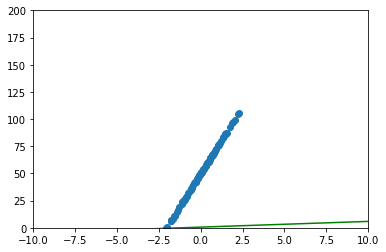

[159652.92763843]
[0.83498839]
[0.45664988]


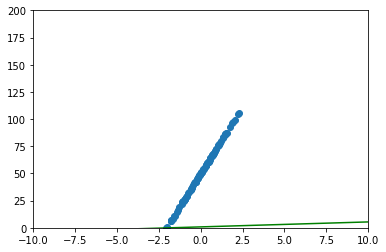

[158773.40828259]
[1.04545558]
[0.38777247]


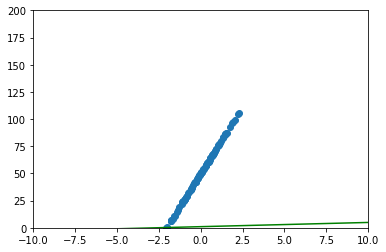

[157903.53597944]
[1.25474887]
[0.31928103]


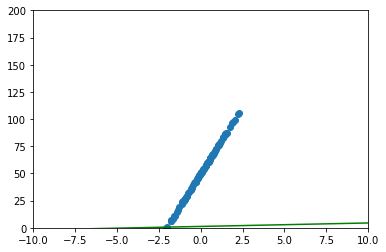

[157043.20407678]
[1.4628748]
[0.25117342]


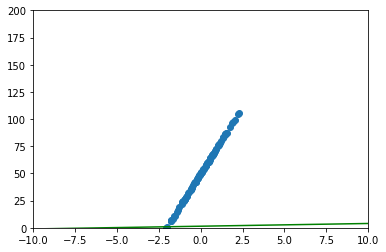

[156192.30710536]
[1.66983991]
[0.18344749]


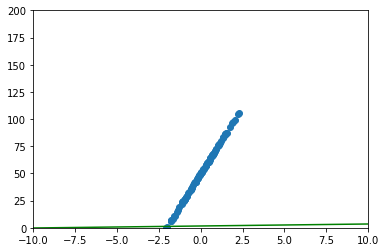

[155350.74076577]
[1.87565065]
[0.11610112]


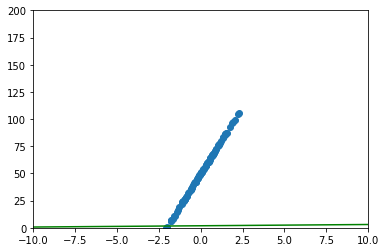

[154518.40191545]
[2.08031348]
[0.04913218]


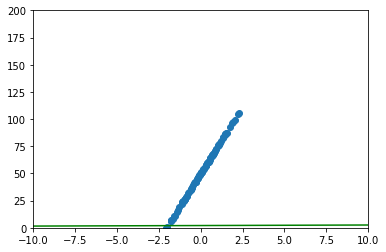

[153695.18855578]
[2.2838348]
[-0.01746143]


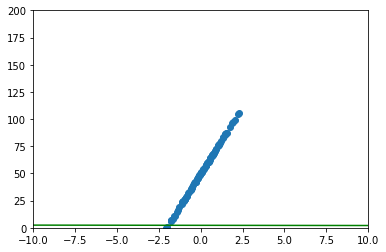

[152880.99981944]
[2.48622097]
[-0.08368181]


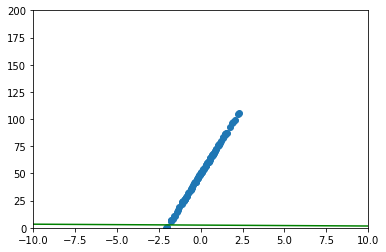

[152075.73595781]


In [3]:
%matplotlib inline
from sklearn.datasets import make_regression #导入 make_regression()函数，用来生成回归
import matplotlib.pyplot as plt #导入 matplotlib.pyplot，并且重命名为 plt
import numpy as np #导入 numpy 库，并且重命名为 np
x, y= make_regression(n_samples=100, n_features=1, noise=0.4, bias=50) # 生成一组数据集
# 用来画出生成数据集的散点图和拟合线性模型 
def plotLine(theta0, theta1, x, y): 
    # theta0 is b, theta1 is k
    max_x = np.max(x) + 100 #np.max(x)用来取出 x 中的最大值
    min_x = np.min(x) - 100 #np.min(x)用来取出 x 中的最小值
    
    # np.linspace函数用来返回num个等间距的样本（指定区间）
    xplot = np.linspace(min_x, max_x, 1000) #在区间[min_x,max_x]中返回 1000 个等间隔的样本
    yplot = theta0 + theta1 * xplot #将 x 带入线性方程 y=k*x+b 中求得 y
    print(theta0) #打印参数 theta0
    print(theta1) #打印参数 theta1
    
    # plt.plot可视化函数
    plt.plot(xplot, yplot, color='g', label='Regression Line') #画出线性模型，参数依次表示：横坐标，纵坐标，颜色，标签
    
    # plt.scatter散点图函数
    plt.scatter(x,y) #画散点图，参数依次表示横坐标、纵坐标
    
    # 坐标轴范围设置函数
    plt.axis([-10, 10, 0, 200]) #设置横坐标范围为【-10，10】，纵轴范围为【0，200】
    plt.show() #显示可视化图像
    
# 该函数根据给定的x值预测y的值
def hypothesis(theta0, theta1, x):
    return theta0 + (theta1*x)
# 计算损失 最小二乘法
def cost(theta0, theta1, x, y): 
    costValue = 0
    for (xi, yi) in zip(x, y): #使用 zip()函数，包为元组的列表
        # zip(x,y)函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表
        costValue += 0.5 * ((hypothesis(theta0, theta1, xi) - yi)**2) #使用最小二乘法来计算损失
    return costValue #返回损失值

# 梯度的计算
def derivatives(theta0, theta1, x, y): #derivative:导数
    dtheta0 = 0 #dtheta0：参数 theta0 的梯度，初始化为 0
    dtheta1 = 0 #dtheta0：参数 theta0 的梯度，初始化为 0
    for (xi, yi) in zip(x, y): #使用 zip()函数依次取出(xi,yi)
        dtheta0 += hypothesis(theta0, theta1, xi) - yi #计算公式为：损失函数对参数dtheta0 求偏导。
        dtheta1 += (hypothesis(theta0, theta1, xi) - yi)*xi #计算公式为：损失函数对参数dtheta1 求偏导。
        dtheta0 /= len(x) #求平均梯度，len(x)函数用来计算 x 中的样本数
        dtheta1 /= len(x) #求平均梯度
    return dtheta0, dtheta1

# 用来对参数进行更新的函数
def updateParameters(theta0, theta1, x, y, alpha): #参数的更新，alpha 表示学习率
    # 对于参数 w，其更新方式为：w = w - 学习率 * 梯度值
    dtheta0, dtheta1 = derivatives(theta0, theta1, x, y) #dtheta0, dtheta1 分 别表 示 参数theta0，theta1 的梯度值。
    theta0 = theta0 - (alpha * dtheta0) #依据参数更新方式更新参数 theta0
    theta1 = theta1 - (alpha * dtheta1) #依据参数更新方式更新参数 theta1
    return theta0, theta1 #返回更新好的参数
def LinearRegression(x, y):
    theta0 = np.random.rand() #给 theta0 赋一个随机初始值。
    theta1 = np.random.rand() #给 theta1 赋一个随机初始值。
    for i in range(0, 1000): #进行 1000 次参数的更新，每隔 100 次跟新打印一次图片
        if i % 100 == 0: #只有当 i 整除 100 时才进行一次图片打印
            plotLine(theta0, theta1, x, y)
            print(cost(theta0, theta1, x, y))
        theta0, theta1 = updateParameters(theta0, theta1, x, y, 0.005) #调用参数更新函数来对参数进行更新，其中学习率指定为：0.005.
LinearRegression(x, y) #调用线性回归函数。